In [1]:
import os 
os.getcwd()

'C:\\Users\\RAHUL SRIVASTAVA\\Desktop\\Learnbay\\ML\\Decision_Tree'

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [47]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

# Data Preprocessing

In [48]:
# 1. Handling Missing Value
# 2. Handling Outlier - Outlier only require when wehave large tree to avoid overfitting
# Overfitting means your model is not pure it is impure means there is lots of error is coming.Thatswhy you are getting overfitting
# 3. Encoding - In tree based model always use label encoding method
# 4. Feature Scaling - Please note,there is no need to do feature scaling in DT bcoz we are just allocating whether that value will represent or not.
# 5.  Imbalance Treatment

In [49]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [51]:
dataset['State'] = dataset['State'].astype('category')
dataset['State'] = dataset['State'].cat.codes

In [52]:
dataset.head()

R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94

# Split the data into dependent and independent variable

In [53]:
x = dataset.iloc[:,0:-1]
y = dataset[['Profit']]

In [54]:
x.shape,y.shape

((50, 4), (50, 1))

# splitting the data into training and test

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

# Building Decision Tree Regressor Model


In [64]:
from sklearn.tree import DecisionTreeRegressor
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
# Decision Tree is non Parametric model here we don't have any Assumptions like Linear Regression

# 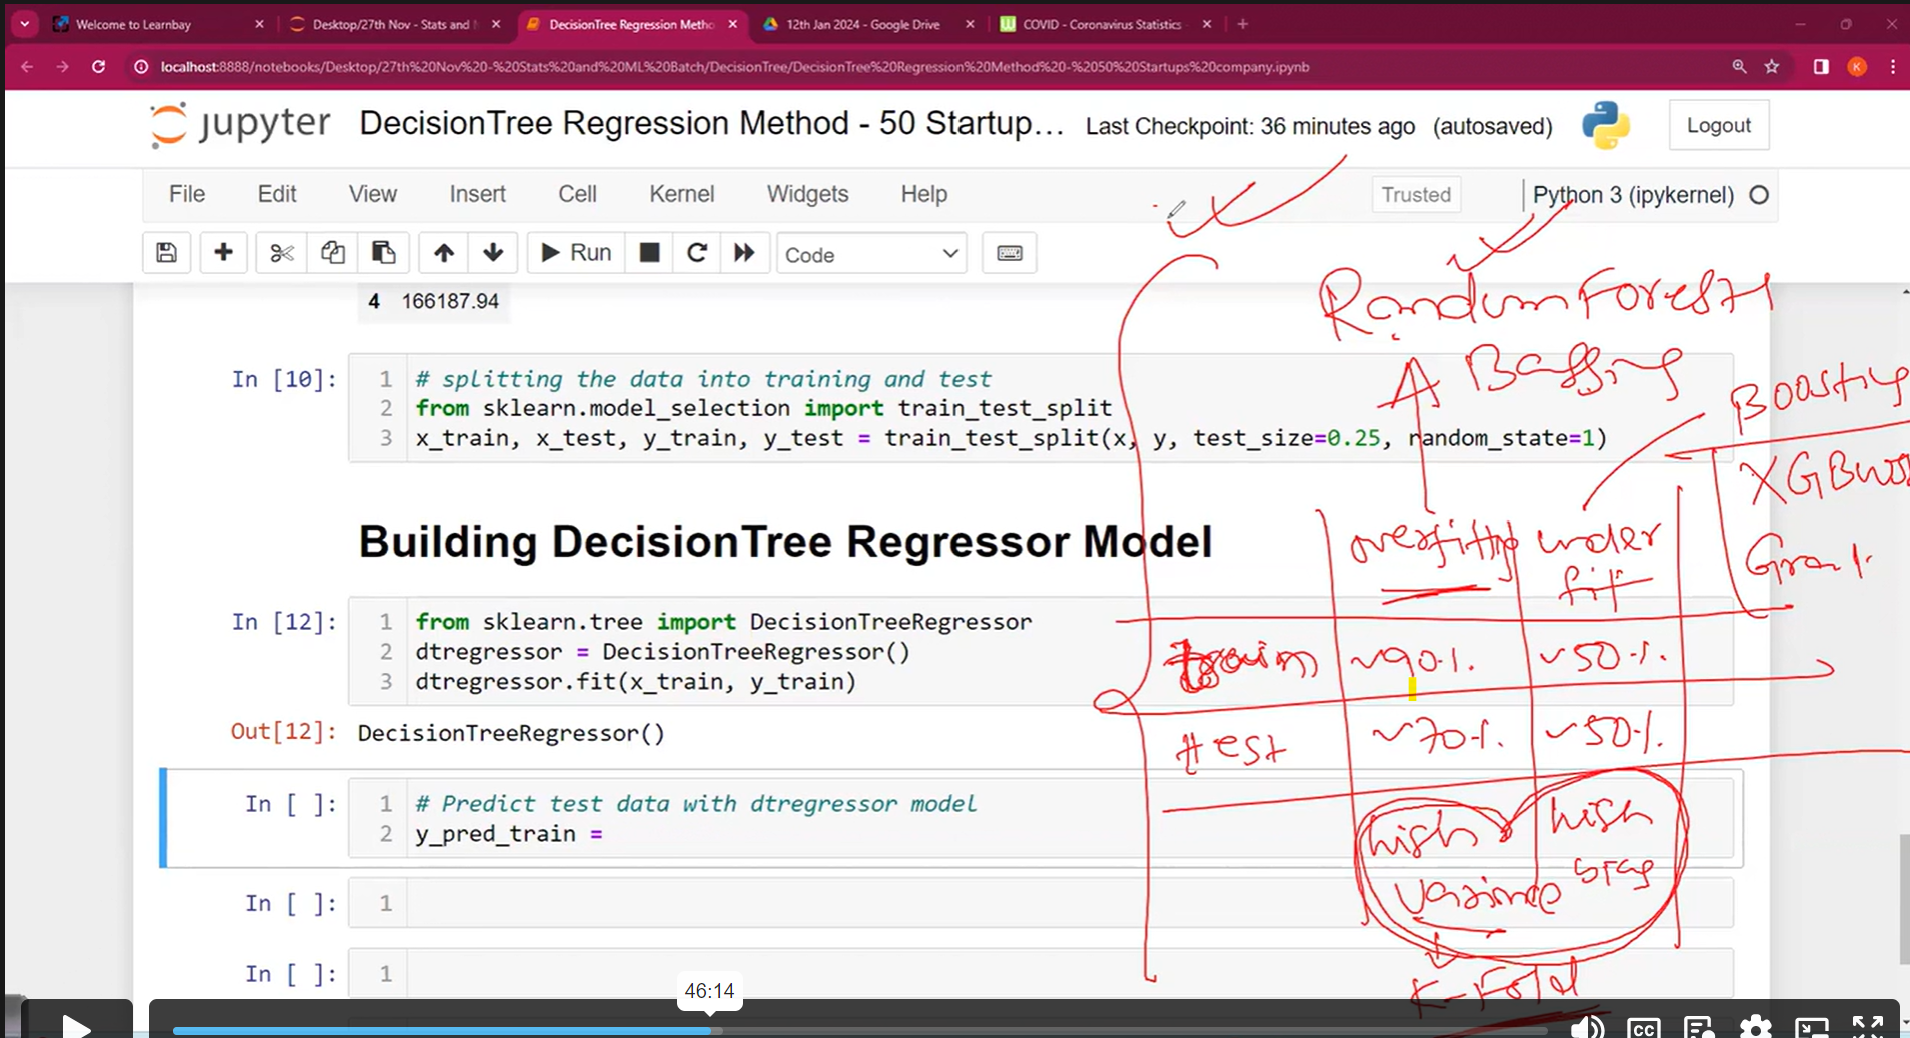

# Predict Test Data with Decision Tree Regressor Model

In [66]:
y_pred_train = dtRegressor.predict(x_train)
y_pred_test = dtRegressor.predict(x_test)

# Evaluate your Model

In [67]:
from sklearn.metrics import  r2_score


In [68]:
print('Training Accuracy : ',r2_score(y_train,y_pred_train))
print()
print('Test Accuracy : ',r2_score(y_test,y_pred_test))

Training Accuracy :  1.0

Test Accuracy :  0.8978427744373091


# Since I am getting 100% in training accuracy so this is an overfitting variance is okay but 100 % I am getting training accuracy - K-Fold

# Using Cross Validation Method - K fold Method

In [69]:
from sklearn.model_selection import cross_val_score
Training_Accuracy = cross_val_score(dtRegressor,x_train,y_train,cv=10)
print(Training_Accuracy)


[  0.75859449   0.8686139    0.54063583   0.87707088   0.96925619
   0.26165478   0.92993926   0.27110755 -21.22435468   0.92487939]


In [70]:
print(Training_Accuracy.mean())

-1.482260240613908


# linear Regression Model

In [75]:

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [76]:
#Predict the train and test with Linear model
y_pred_train_lr = linear.predict(x_train)
y_pred_test_lr = linear.predict(x_test)

In [77]:
print('Training Accuracy : ',r2_score(y_train,y_pred_train_lr))
print()
print('Test Accuracy : ',r2_score(y_test,y_pred_test_lr))

Training Accuracy :  0.9419507593691141

Test Accuracy :  0.9616053937220067


# Random Forest Regressor Model

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=500) #100 decision tree I am building that's why it is called Ensemble
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [84]:
#Predict the train and test with Linear model
y_pred_train_rf = rf_regressor.predict(x_train)
y_pred_test_rf = rf_regressor.predict(x_test)

In [85]:
print('Training Accuracy : ',r2_score(y_train,y_pred_train_rf))
print()
print('Test Accuracy : ',r2_score(y_test,y_pred_test_rf))

Training Accuracy :  0.9855904843449871

Test Accuracy :  0.9438374607010358


# Classification Problem

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [89]:
df = pd.read_csv('penguins_lter.csv')

In [90]:
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/2007   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/2007   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/2007   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/2007   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/2007   

   Culmen Length (mm)  Culmen Depth (mm) Flipper Length (mm) Body Mass (g)  \
0                39.1               18.7                 181             .   
1                39.5               17.4                 186          3800   
2                40.3               18.0                   .          3250   
3                 NaN                NaN                 NaN           NaN   
4                36.7               19.3                 193          3450   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [91]:
df.shape

(344, 17)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    object 
 12  Body Mass (g)        342 non-null    object 
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [93]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [94]:
df.head(2)

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/2007   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/2007   

   Culmen Length (mm)  Culmen Depth (mm) Flipper Length (mm) Body Mass (g)  \
0                39.1               18.7                 181             .   
1                39.5               17.4                 186          3800   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN

In [95]:
#Pre Pruning Approach
df.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'],axis=1,inplace = True)

In [96]:
df.head(2)

Species  Region     Island               Stage  \
0  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   
1  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   

  Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes                39.1               18.7   
1               Yes                39.5               17.4   

  Flipper Length (mm) Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                 181             .    MALE                NaN   
1                 186          3800  FEMALE            8.94956   

   Delta 13 C (o/oo)  
0                NaN  
1          -24.69454

In [97]:
df.shape

(344, 12)

# Data Preprocessing

In [98]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [99]:
 df.isnull().sum()/len(df)*100

Species                0.000000
Region                 0.000000
Island                 0.000000
Stage                  0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
Delta 15 N (o/oo)      4.069767
Delta 13 C (o/oo)      3.779070
dtype: float64

In [100]:
#all the observation is less than 5% ,in this case we are not supposed to remove the variable,we have to do imputation method
#20% missing data or 25% missing data before dropping the variable first take the confirmation from the business stakeholder
#take their concurrence ,ask them if the data is available otherwise we have to drop that variable,otherwise it will create bias


In [101]:
# Finding the unique values in given dataset
for i in df.columns:
    print("*******************************"
              ,i,"*******************************")
    print()
    print(set(df[i].to_list()))

******************************* Species *******************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}
******************************* Region *******************************

{'Anvers'}
******************************* Island *******************************

{'Torgersen', 'Biscoe', 'Dream'}
******************************* Stage *******************************

{'Adult, 1 Egg Stage'}
******************************* Clutch Completion *******************************

{'No', 'Yes'}
******************************* Culmen Length (mm) *******************************

{49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, nan, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 

In [102]:
df['Flipper Length (mm)'].mode()

0    190
Name: Flipper Length (mm), dtype: object

In [103]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.',
                                    '190',
                                     df['Flipper Length (mm)'])

In [104]:
df['Body Mass (g)'].mode()

0    3800
Name: Body Mass (g), dtype: object

In [105]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.',
                                '3800',
                                df['Body Mass (g)'])

In [106]:
df['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [107]:
df['Sex'] = np.where(df['Sex']=='.',
                               'MALE',
                                df['Sex'])

In [108]:
for i in df.columns:
    print("*******************************"
              ,i,"*******************************")
    print()
    print(set(df[i].to_list()))

******************************* Species *******************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}
******************************* Region *******************************

{'Anvers'}
******************************* Island *******************************

{'Torgersen', 'Biscoe', 'Dream'}
******************************* Stage *******************************

{'Adult, 1 Egg Stage'}
******************************* Clutch Completion *******************************

{'No', 'Yes'}
******************************* Culmen Length (mm) *******************************

{49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, nan, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, nan, 45.0, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.1, 35.0, 35.5, 36.6, 36.4, 36.5, 36.0, 3

In [109]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [110]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [111]:
for i in df.columns:
    print("*******************************"
              ,i,"*******************************")
    print()
    print(set(df[i].to_list()))

******************************* Species *******************************

{'Gentoo penguin (Pygoscelis papua)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)'}
******************************* Region *******************************

{'Anvers'}
******************************* Island *******************************

{'Torgersen', 'Biscoe', 'Dream'}
******************************* Stage *******************************

{'Adult, 1 Egg Stage'}
******************************* Clutch Completion *******************************

{'No', 'Yes'}
******************************* Culmen Length (mm) *******************************

{49.4, 49.9, nan, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.7, 38.9, 39.5, 40.3, 42.0, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 44.0, 48.2, 45.0, nan, 50.2, 43.8, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 3

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [113]:
df.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [114]:
df.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [115]:
#Numerical column --> 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
#Char Variable --> 'Sex',

In [116]:
df['Sex'].value_counts()

Sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [117]:
df['Sex'] = df['Sex'].fillna('MALE')

In [118]:
#Splitting the data into train and test before doing Simple_Imputer
#median is not influenced by outlier
#so impute all 6 variable at one go rather than one by one
# x = df.iloc[:,1:]
# y= df[['Species']]
numerical = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
categorical = ['Species', 'Region', 'Island', 'Stage', 'Clutch Completion','Sex']

In [119]:
y.head()

Species
0  Adelie Penguin (Pygoscelis adeliae)
1  Adelie Penguin (Pygoscelis adeliae)
2  Adelie Penguin (Pygoscelis adeliae)
3  Adelie Penguin (Pygoscelis adeliae)
4  Adelie Penguin (Pygoscelis adeliae)

In [120]:
df['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [121]:
# df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].median())
# df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].median())
# df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].median())
# df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].median())
# df['Delta 15 N (o/oo)'] = df['Delta 15 N (o/oo)'].fillna(df['Delta 15 N (o/oo)'].median())
# df['Delta 13 C (o/oo)'] = df['Delta 13 C (o/oo)'].fillna(df['Delta 13 C (o/oo)'].median())

In [122]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.nan , strategy='median')
df[numerical] = impute.fit_transform(df[numerical])

"""
Char imputation by mode concept
impute = SimpleImputer(missing_values = np.nan , strategy='most_frequent')
df[categorical] = impute.fit_transform(df[categorical])
"""


"\nChar imputation by mode concept\nimpute = SimpleImputer(missing_values = np.nan , strategy='most_frequent')\ndf[categorical] = impute.fit_transform(df[categorical])\n"

In [123]:
df.isnull().sum()

Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [124]:
#Preprocessing part 2
df.head()

Species  Region     Island               Stage  \
0  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   
1  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   
2  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   
3  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   
4  Adelie Penguin (Pygoscelis adeliae)  Anvers  Torgersen  Adult, 1 Egg Stage   

  Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes               39.10               18.7   
1               Yes               39.50               17.4   
2               Yes               40.30               18.0   
3               Yes               44.45               17.3   
4               Yes               36.70               19.3   

   Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                181.0         3800.0    MALE           8.652405   
1                186.0         3800.0  FEMALE           8.949560   
2                190.0         3250.0  FEMALE           8.368210   
3                197.0         4050.0    MALE           8.652405   
4                193.0         3450.0  FEMALE           8.766510   

   Delta 13 C (o/oo)  
0          -25.83352  
1          -24.69454  
2          -25.33302  
3          -25.83352  
4          -25.32426

# Encoding

In [125]:
# Decision Tree I need to go with Label Encoder
# Linear Regression I need to go with OHE

In [126]:
# df['Species'] = 

In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df['Region'] = encoder.fit_transform(df['Region'])
df['Island'] = encoder.fit_transform(df['Island'])
df['Stage'] = encoder.fit_transform(df['Stage'])
df['Clutch Completion'] = encoder.fit_transform(df['Clutch Completion'])
df['Sex'] = encoder.fit_transform(df['Sex'])

In [128]:
df.head()

Species  Region  Island  Stage  Clutch Completion  Culmen Length (mm)  \
0        0       0       2      0                  1               39.10   
1        0       0       2      0                  1               39.50   
2        0       0       2      0                  1               40.30   
3        0       0       2      0                  1               44.45   
4        0       0       2      0                  1               36.70   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
0               18.7                181.0         3800.0    1   
1               17.4                186.0         3800.0    0   
2               18.0                190.0         3250.0    0   
3               17.3                197.0         4050.0    1   
4               19.3                193.0         3450.0    0   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           8.652405          -25.83352  
1           8.949560          -24.69454  
2           8.368210          -25.33302  
3           8.652405          -25.83352  
4           8.766510          -25.32426

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    int32  
 1   Region               344 non-null    int32  
 2   Island               344 non-null    int32  
 3   Stage                344 non-null    int32  
 4   Clutch Completion    344 non-null    int32  
 5   Culmen Length (mm)   344 non-null    float64
 6   Culmen Depth (mm)    344 non-null    float64
 7   Flipper Length (mm)  344 non-null    float64
 8   Body Mass (g)        344 non-null    float64
 9   Sex                  344 non-null    int32  
 10  Delta 15 N (o/oo)    344 non-null    float64
 11  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(6), int32(6)
memory usage: 24.3 KB


# Outlier

In [130]:
#tree grow larger then you have to handle it
#or you can determing by feature importance part

In [131]:
df.describe()

Species  Region      Island  Stage  Clutch Completion  \
count  344.000000   344.0  344.000000  344.0         344.000000   
mean     0.918605     0.0    0.662791    0.0           0.895349   
std      0.893320     0.0    0.726194    0.0           0.306549   
min      0.000000     0.0    0.000000    0.0           0.000000   
25%      0.000000     0.0    0.000000    0.0           1.000000   
50%      1.000000     0.0    1.000000    0.0           1.000000   
75%      2.000000     0.0    1.000000    0.0           1.000000   
max      2.000000     0.0    2.000000    0.0           1.000000   

       Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          344.000000         344.000000           344.000000   
mean            43.925000          17.152035           200.877907   
std              5.443792           1.969060            14.032539   
min             32.100000          13.100000           172.000000   
25%             39.275000          15.600000           190.000000   
50%             44.450000          17.300000           197.000000   
75%             48.500000          18.700000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)         Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
count     344.000000  344.000000         344.000000         344.000000  
mean     4201.017442    0.520349           8.730086         -25.691855  
std       799.618885    0.500313           0.540630           0.779277  
min      2700.000000    0.000000           7.632200         -27.018540  
25%      3550.000000    0.000000           8.307415         -26.285460  
50%      4050.000000    1.000000           8.652405         -25.833520  
75%      4750.000000    1.000000           9.136170         -25.089467  
max      6300.000000    1.000000          10.025440         -23.787670

# Feature Scaling
#because I am not doing any differentiation in DT

In [132]:
import dtale
dtale.show(df)

# Imbalance Treatment

# Multivariate Analysis
# To understand if Else condition of DT

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

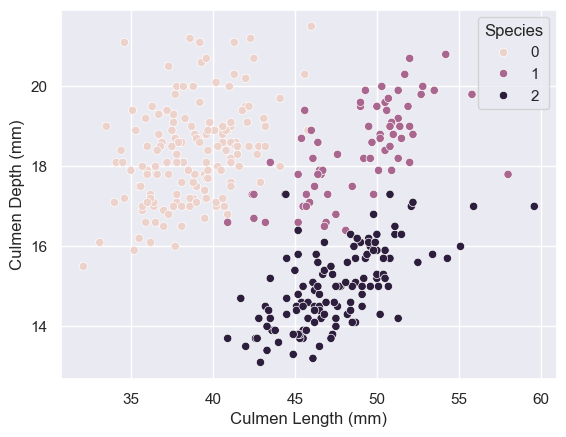

In [137]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=df,hue='Species')

#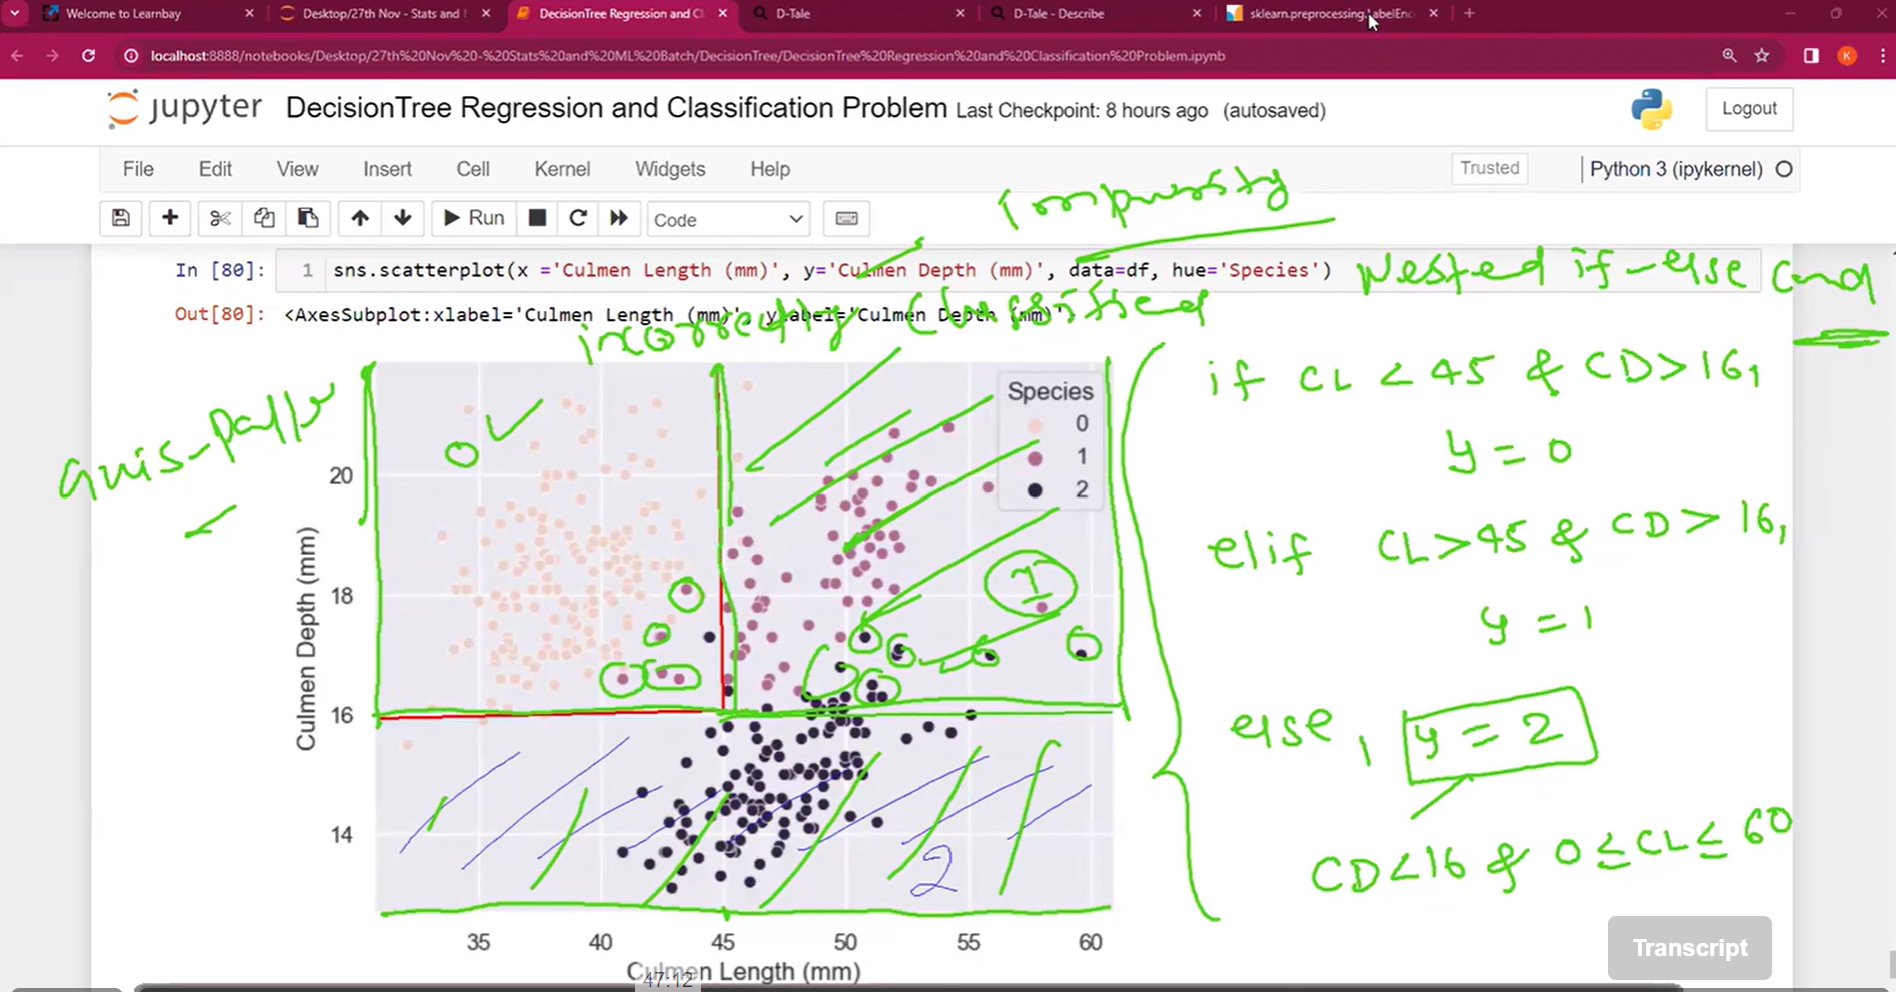

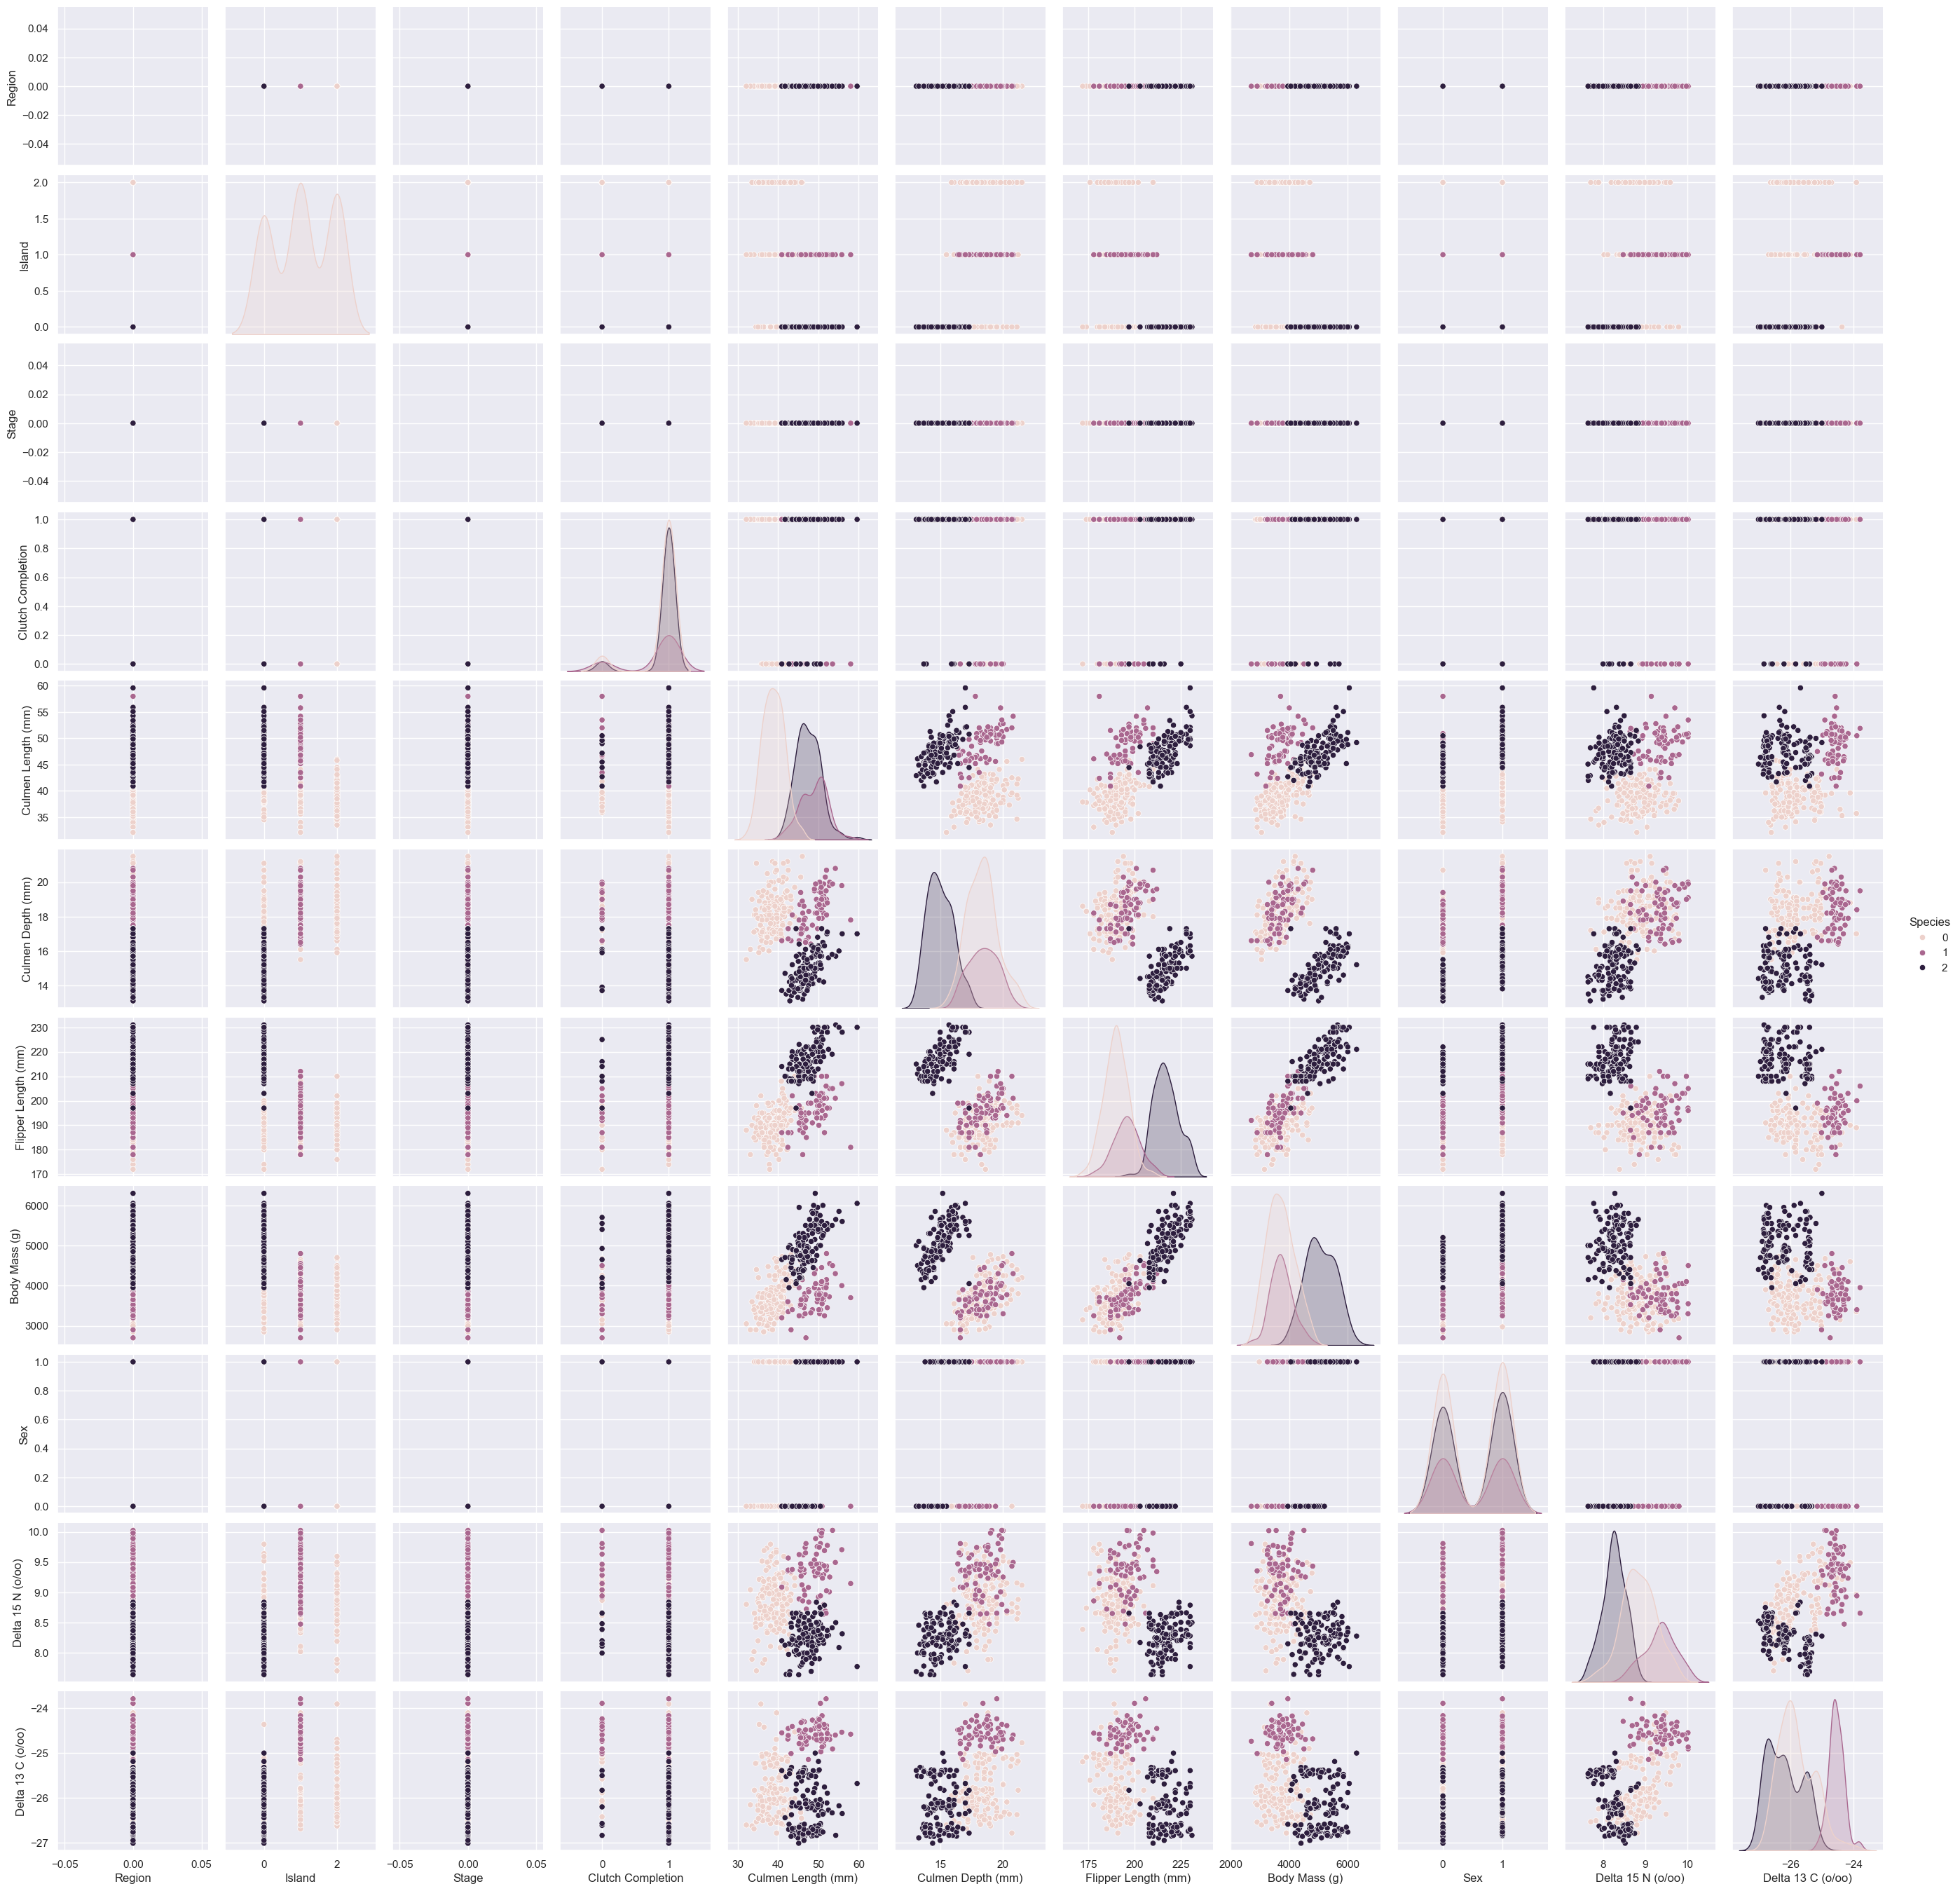

In [138]:
sns.pairplot(data=df,hue='Species')
plt.show()

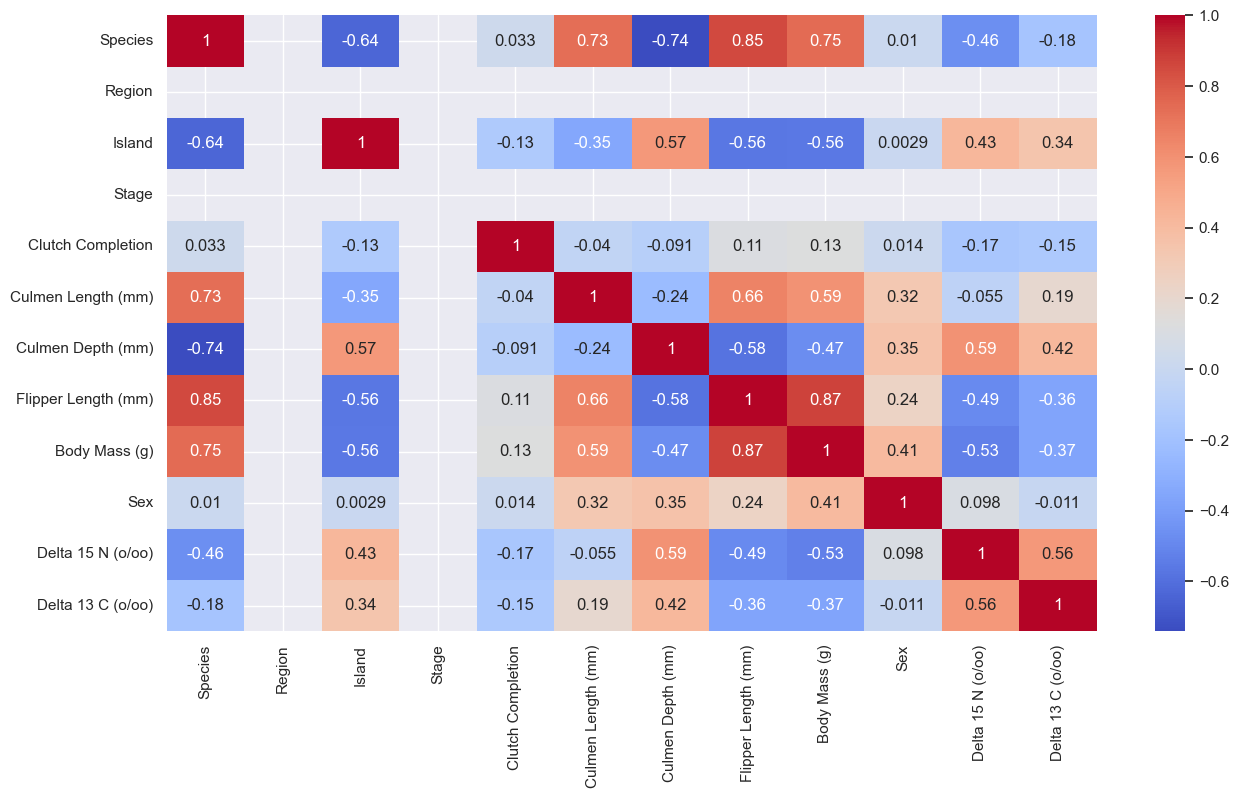

In [142]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# I am getting 0.85 in heatmap but in DT we dont take care of multicollinearity,so you can ignore this


2024-09-25 09:23:42,441 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-25 09:23:42,448 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


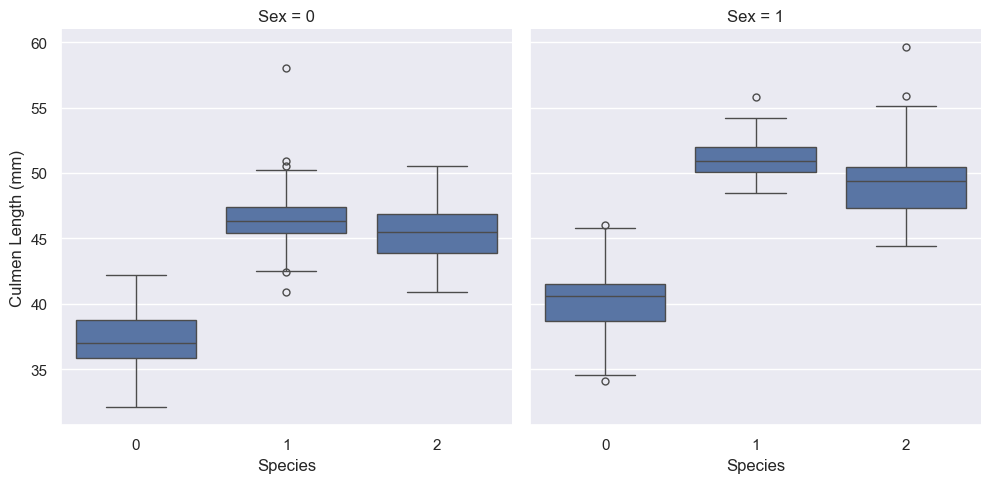

In [143]:
sns.catplot(data=df,x='Species',y='Culmen Length (mm)',kind='box',col='Sex')

In [ ]:
# Split the data into independent and dependent variable

In [147]:
x = df.iloc[:,1:]
y=df.iloc[:,0]

In [148]:
x.head()

Region  Island  Stage  Clutch Completion  Culmen Length (mm)  \
0       0       2      0                  1               39.10   
1       0       2      0                  1               39.50   
2       0       2      0                  1               40.30   
3       0       2      0                  1               44.45   
4       0       2      0                  1               36.70   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
0               18.7                181.0         3800.0    1   
1               17.4                186.0         3800.0    0   
2               18.0                190.0         3250.0    0   
3               17.3                197.0         4050.0    1   
4               19.3                193.0         3450.0    0   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0           8.652405          -25.83352  
1           8.949560          -24.69454  
2           8.368210          -25.33302  
3           8.652405          -25.83352  
4           8.766510          -25.32426

In [149]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# Imbalance Treatment

# Do UnderSampling in Text Analytics where we have huge dataset
# Always do oversampling

In [151]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler()
x_over,y_over = ros.fit_resample(x,y)
print("Imbalance Datapoints:",y.value_counts())
print()
print("Balance Datapoints:",y_over.value_counts())

Imbalance Datapoints: Species
0    152
2    124
1     68
Name: count, dtype: int64

Balance Datapoints: Species
0    152
1    152
2    152
Name: count, dtype: int64


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,random_state=1,test_size=0.25,stratify=y_over)


# Building Decision Tree Model

In [166]:
from sklearn.tree import DecisionTreeClassifier

# Approach 1 - Gini
dtree1 = DecisionTreeClassifier(criterion='gini')#by default gini provided
dtree1.fit(x_train,y_train)

# Approach 1 - Entropy
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

# Predict the test data by using both the models

In [167]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

y_pred_dt2_train = dtree2.predict(x_train)
y_pred_dt2_test = dtree2.predict(x_test)

# Evaluate Your Model

In [168]:
from sklearn.metrics import classification_report ,confusion_matrix, accuracy_score

In [169]:
print(classification_report(y_train,y_pred_dt1_train))
print()
print(classification_report(y_test,y_pred_dt1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.97      0.99        38
           2       0.95      0.97      0.96        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [170]:
print(classification_report(y_train,y_pred_dt2_train))
print()
print(classification_report(y_test,y_pred_dt2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00       114

    accuracy                           1.00       342
   macro avg       1.00      1.00      1.00       342
weighted avg       1.00      1.00      1.00       342


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        38
           2       0.97      1.00      0.99        38

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [171]:
print(confusion_matrix(y_train,y_pred_dt1_train))
print()
print(confusion_matrix(y_test,y_pred_dt1_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[37  0  1]
 [ 0 37  1]
 [ 1  0 37]]


In [172]:
print(confusion_matrix(y_train,y_pred_dt2_train))
print()
print(confusion_matrix(y_test,y_pred_dt2_test))

[[114   0   0]
 [  0 114   0]
 [  0   0 114]]

[[36  1  1]
 [ 0 38  0]
 [ 0  0 38]]


In [176]:
print("Train Accuracy - Gini: ",accuracy_score(y_train,y_pred_dt1_train))
print()
print("Test Accuracy - Gini: ",accuracy_score(y_test,y_pred_dt1_test))

Train Accuracy - Gini:  1.0

Test Accuracy - Gini:  0.9736842105263158


In [178]:
print("Train Accuracy -Entropy :",accuracy_score(y_train,y_pred_dt2_train))
print()
print("Test Accuracy -Entropy :",accuracy_score(y_test,y_pred_dt2_test))

Train Accuracy -Entropy : 1.0

Test Accuracy -Entropy : 0.9824561403508771


# Cross Validation - K_Fold_Method

In [179]:
from sklearn.model_selection import cross_val_score
accuracy =  cross_val_score(dtree1,x_train,y_train,cv=10)

In [180]:
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.88571429 1.         1.         1.         0.97058824 0.94117647
 1.         0.94117647 0.97058824 1.        ]

0.9709243697478991

1.0


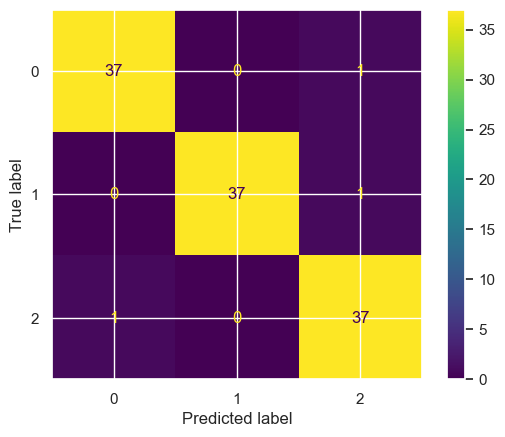

In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, dtree1.predict(x_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

# Post Pruning

In [189]:

dtree1.feature_importances_

array([0.        , 0.01723807, 0.        , 0.        , 0.04058196,
       0.        , 0.46088301, 0.00556215, 0.        , 0.        ,
       0.47573481])

In [190]:
pd.DataFrame(index=x.columns,data=dtree1.feature_importances_,columns = ["Feature Importance"])

Feature Importance
Region                         0.000000
Island                         0.017238
Stage                          0.000000
Clutch Completion              0.000000
Culmen Length (mm)             0.040582
Culmen Depth (mm)              0.000000
Flipper Length (mm)            0.460883
Body Mass (g)                  0.005562
Sex                            0.000000
Delta 15 N (o/oo)              0.000000
Delta 13 C (o/oo)              0.475735

In [ ]:
Order of feature Importance for variables
#Delta 13 C (o/oo)	0.475735
#Flipper Length (mm)	0.460883

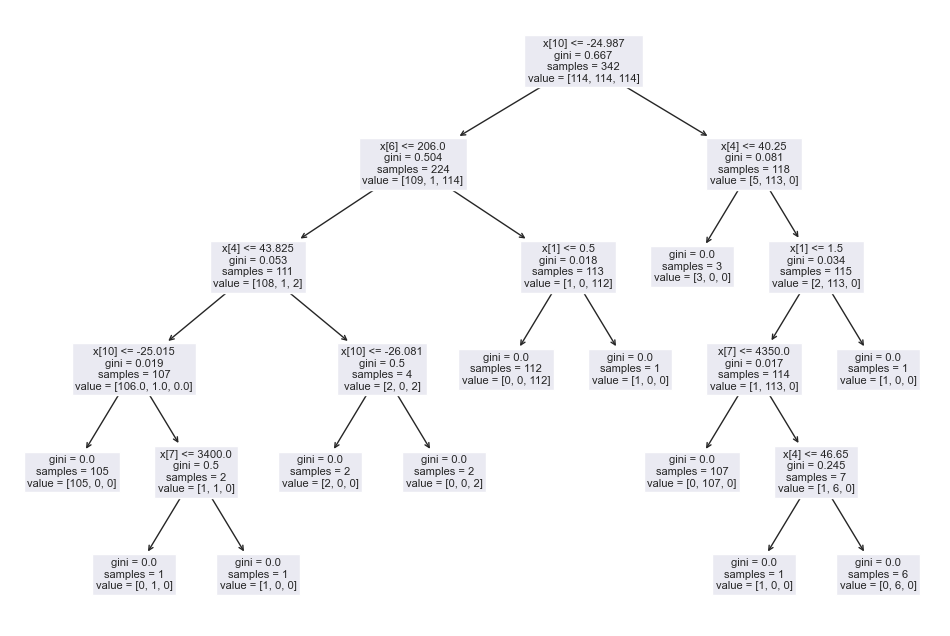

In [191]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1)
plt.show()

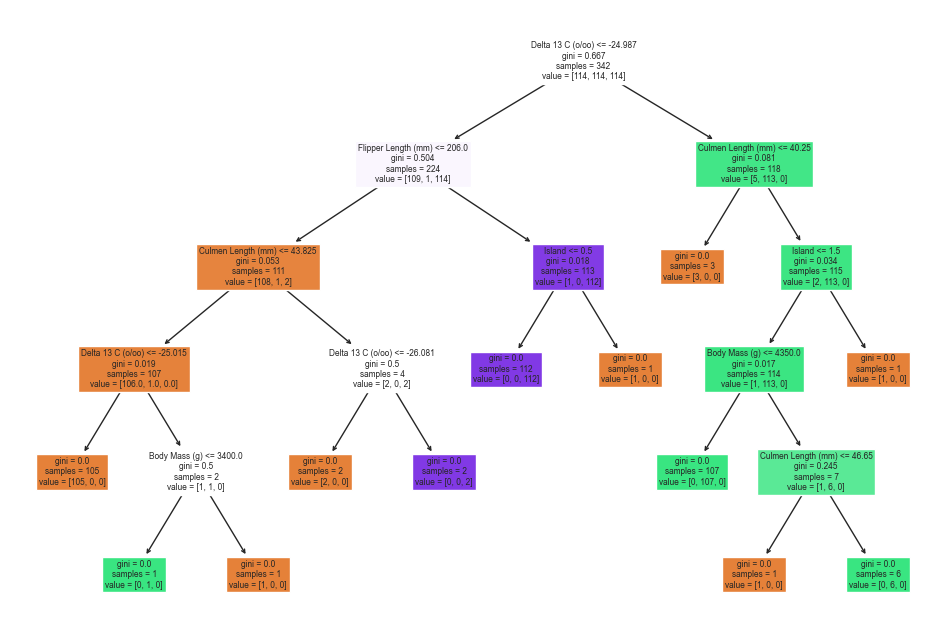

In [193]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1,filled=True,feature_names=x.columns)
plt.show()
#values is dependent variable - species
#sample - how many data is available there


# Using HypeParamete in DT to apply post pruning Method


In [201]:
#where feature importnacevalue is not zero
prunned_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)
prunned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

# User Definded Functions

In [202]:
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print("\n")
    print(accuracy_score(y_test,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names = x.columns)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       1.00      0.97      0.99        38
           2       0.93      0.97      0.95        38

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.97       114
weighted avg       0.97      0.96      0.97       114



0.9649122807017544




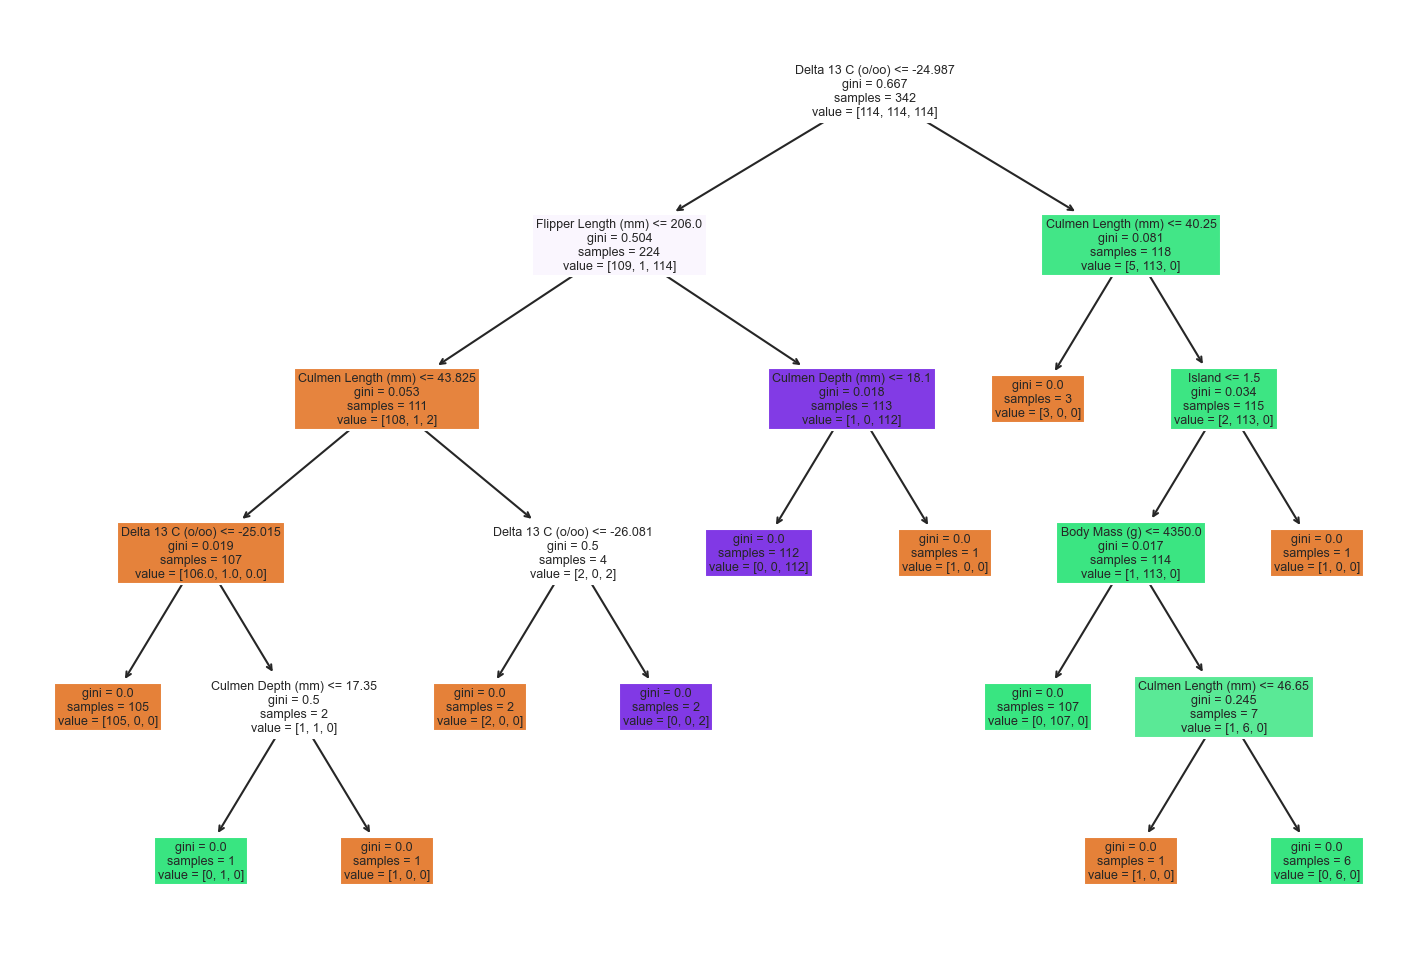

In [203]:
report_model(prunned_tree)
#precision - macro avg       0.97      0.96      0.97       114
#Accuracy - 0.9649122807017544

# Logistic Regression 

In [205]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [207]:
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [213]:
print("Train Accuracy - Logit :", accuracy_score(y_train, y_pred_train_logit))
print()  # This will print a blank line
print("Test Accuracy - Logit :", accuracy_score(y_test, y_pred_test_logit))

Train Accuracy - Logit : 0.9970760233918129

Test Accuracy - Logit : 0.9912280701754386


In [ ]:
# Overfitting situation

In [ ]:
# For multiclass - don't go by Logistic Regression only go by DT or you can go by Random Forest (SOTA)

# Bagging Classifier

In [215]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier() # base_estimator = 'DT' by default
bagging.fit(x_train,y_train)

BaggingClassifier()

In [217]:
y_pred_bagging_train = bagging.predict(x_train)
print()
y_pred_bagging_test = bagging.predict(x_test)

In [218]:
print("Train Accuracy - Logit :", accuracy_score(y_train, y_pred_bagging_train))
print()  # This will print a blank line
print("Test Accuracy - Logit :", accuracy_score(y_test, y_pred_bagging_test))

Train Accuracy - Logit : 1.0

Test Accuracy - Logit : 0.9736842105263158


# Random Forest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',n_estimators=200,bootstrap=True,oob_score=True) #no concept of base estimator #hyperparameter tuning I am building here
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, oob_score=True)

In [226]:
y_pred_rf_train = rf.predict(x_train)
print()
y_pred_rf_test = rf.predict(x_test)

In [227]:
print("Train Accuracy - Logit :", accuracy_score(y_train, y_pred_rf_train))
print()  # This will print a blank line
print("Test Accuracy - Logit :", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy - Logit : 1.0

Test Accuracy - Logit : 0.9912280701754386


# Applying Cross Validation Method

In [228]:
from sklearn.model_selection import cross_val_score
Training_Accuracy = cross_val_score(rf,x_train,y_train,cv=10)
print(Training_Accuracy)

[0.97142857 0.97142857 1.         1.         0.97058824 0.97058824
 1.         0.97058824 1.         1.        ]


In [229]:
print(Training_Accuracy.mean())
print()
print(Training_Accuracy.max())

0.9854621848739497

1.0
